In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

2025-11-11 15:46:13.710347: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-11 15:46:14.194672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-11 15:46:17.462852: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
#load dataset
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')
x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

#Resahpe data
x_train = x_train.reshape(len(x_train), 100,100,3)
x_test = x_test.reshape(len(x_test), 100,100,3)

#Noramlize pixel value

x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
#Deifne cnn model
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),  
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

#Compile model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#Train model
history = model.fit(x_train,y_train,
                    epochs = 10,
                    batch_size = 64,
                    validation_split = 0.2)
        
#Evaluate model
loss, acc = model.evaluate(x_test,y_test)
print("Total loss",loss)
print("Test Accuracy",acc)

/home/mohit/miniconda3/envs/dl/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762876023.161558    2042 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1765 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


2025-11-11 15:47:05.415226: I external/local_xla/xla/service/service.cc:163] XLA service 0x7147d400a9f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-11 15:47:05.415276: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-11-11 15:47:05.462964: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-11 15:47:05.707329: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301


 5/25 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5561 - loss: 0.8191

I0000 00:00:1762876031.558220    2143 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.6044 - loss: 0.7103 - val_accuracy: 0.0000e+00 - val_loss: 0.9599
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6331 - loss: 0.6472 - val_accuracy: 0.0075 - val_loss: 0.9994
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6775 - loss: 0.5843 - val_accuracy: 0.3550 - val_loss: 0.9361
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7487 - loss: 0.5147 - val_accuracy: 0.4925 - val_loss: 0.7943
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8169 - loss: 0.4323 - val_accuracy: 0.5075 - val_loss: 0.9593
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8181 - loss: 0.3813 - val_accuracy: 0.4625 - val_loss: 1.1211
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8537 - loss: 0.3431 - val_accuracy: 0.2850 - val_loss: 1.5641
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8788 - loss: 0.2958 - val_accuracy: 0.6875 - val_lo

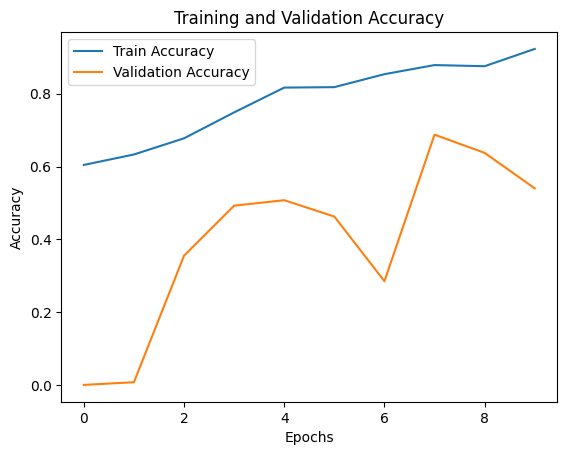

In [4]:
#Plot Accuracy
plt.plot(history.history['accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

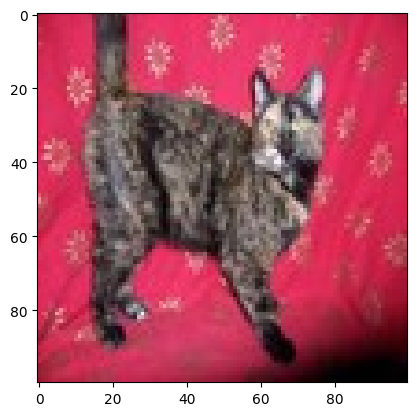

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
Our model says it is a: Cat


In [11]:
import random
idx = random.randint(0, len(y_test)-1)
plt.imshow(x_test[idx])
plt.show()

y_pred = model.predict(x_test[idx].reshape(1,100,100,3))
y_pred = y_pred > 0.5 

if y_pred == 0:
    pred = "Dog"
else:
    pred = "Cat"

print("Our model says it is a:", pred)